In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
# we are loading the data to the notebook with pandas library.
# Then we start to analyze which columns has no meanings for our predictions/project
# as we can se, PassengerId has only id numbers of the passengers so that we are going to delete
# this column without questioning.
train = pd.read_csv('dataset/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.drop(columns=['PassengerId'],inplace=True) # drop the unnecessary columns

In [4]:
# run this code for bigger plotting 
#sns.set(rc={'figure.figsize':(20,8)})

In [5]:
# let's check the general values/numbers statistics of the whole data
# the data seems cool for now
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# MISSING VALUE Operations

In [6]:
# missing values are not a good thing for these kinda data science and machine learning projects
# that is why we are gonna handle this topic now
# we have some missing values, let's check them with a visualisation plot
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


<AxesSubplot:>

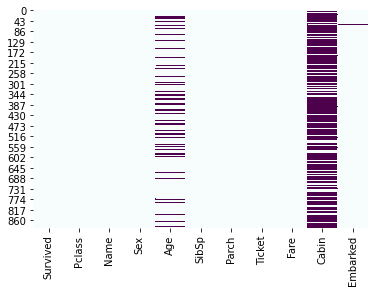

In [7]:
# we see some 'age,cabin' and a few 'Embarked' missing values in our dataset
# now we'll check if we can replace these missing values with something or not
sns.heatmap(train.isnull(), cmap="BuPu", cbar=False)

# CABIN

In [8]:
# as you can see, we have 146 unique values for cabin data.
# since we don^t have a reference for filling the data we'll drop this column as well
print(train['Cabin'].nunique())
train['Cabin'].unique()

147


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

<AxesSubplot:>

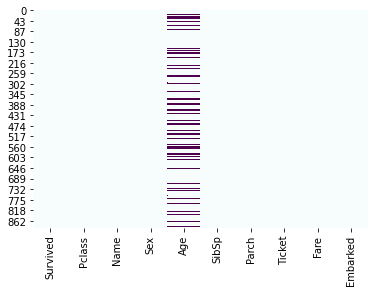

In [9]:
# also we had 2 NaN value in Embarked column
# at the same time we will drop these two row here
train = train.drop(columns=['Cabin'])
train = train[train['Embarked'].notna()]
sns.heatmap(train.isnull(), cmap="BuPu", cbar=False)

# AGE

In [10]:
# age is an important value for our project
# we can make predictions like 'young people generaly survived' or somthing
# so that we are gonna try to fulfill these values with the majority of age values
# which is equal around 24-30
# but there is one more option to make more general filling 
# which is binning these ages 
# check the next cell
ages = train['Age'].value_counts().rename_axis('Age').reset_index(name='counts')
ages

,Age,counts
0,24.00,30
1,22.00,27
2,18.00,26
3,28.00,25
4,30.00,25
...,...,...
83,55.50,1
84,70.50,1
85,66.00,1
86,23.50,1


In [11]:
# we are gonan bin these ages with the values below then 
# we are going to fill NaN values with most comman bin values whic is adult in our case
bins = [0, 5, 12, 25, 60, 80]
labels = ['baby','kid','teen','adult','old']
train['age_group'] = pd.cut(train['Age'], bins=bins, labels=labels)
train['age_group'] = train['age_group'].fillna('adult')
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,teen
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,adult
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,adult
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,adult
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,adult
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,teen
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,adult
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,adult


,age_group,counts
0,adult,567
1,teen,232
2,baby,44
3,kid,25
4,old,21


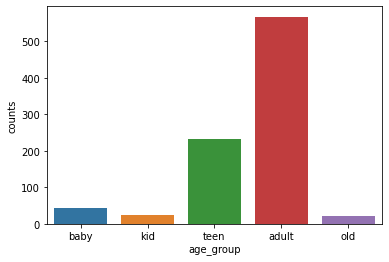

In [12]:
# Let's see these analysis on a seaborn plot
titles = train['age_group'].value_counts().rename_axis('age_group').reset_index(name='counts')
ax = sns.barplot(x=titles['age_group'], y = titles['counts'])
titles

In [13]:
# since we need numerical values to train a model
# we are gonna convert categorical values to a numerical one 
# by using this code below
train.drop(columns=['Age'], inplace=True)
ord_enc = OrdinalEncoder()
train["age_group"] = ord_enc.fit_transform(train[["age_group"]])
train.head()

# now we have 0 1 2 3 4 instead teen adult ...

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,age_group
0,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,4.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,0.0
2,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,0.0
4,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,0.0


In [14]:
train["age_group"].isnull().sum() # let's check the NaN values one more time
# see is everthing OK

0

<AxesSubplot:>

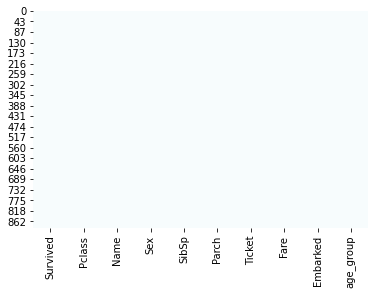

In [15]:
# seems like we are done with missing values
# check this condition one more time with the plot we've done before
sns.heatmap(train.isnull(), cmap="BuPu", cbar=False)

# Passenger Class

In [16]:
# this data has three unique values for passenger classes and this is important
# let's see is it effect the surviving situtation for passengers
# 1 - first class
# 2 - second class
# 3 - third class
train['Pclass'].unique()

array([3, 1, 2])

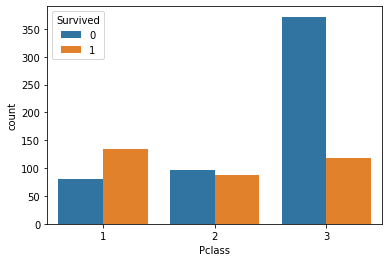

In [17]:
# what are the relationships between passenger class and surviving
# as you can see we have a good relations and we'll use this data in our predictions
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.show()

# SEX

In [18]:
# we have two different gender 
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [19]:
# since the sex data is categorical we'll convert this to numerical data like we done before
ord_enc = OrdinalEncoder()
train["Sex"] = ord_enc.fit_transform(train[["Sex"]])
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,age_group
0,0,3,"Braund, Mr. Owen Harris",1.0,1,0,A/5 21171,7.2500,S,4.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,1,0,PC 17599,71.2833,C,0.0
2,1,3,"Heikkinen, Miss. Laina",0.0,0,0,STON/O2. 3101282,7.9250,S,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,1,0,113803,53.1000,S,0.0
4,0,3,"Allen, Mr. William Henry",1.0,0,0,373450,8.0500,S,0.0


# EMBARKED

In [20]:
# this data explains three different locations that passengers embarked into the ship
# i dont know it is effected on surviving
# we'll see it in the next cell
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [21]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

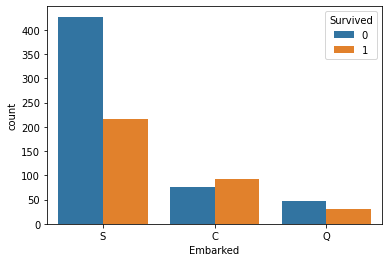

In [22]:
# when we compare the surviving between amount of the passengers it seems quite 
# normal, and we'll use this data as well
sns.countplot(x= train['Embarked'], hue= train['Survived'])

In [23]:
# since this embarked data categorical, we do one more convertion here
ord_enc = OrdinalEncoder()
train["Embarked"] = ord_enc.fit_transform(train[["Embarked"]])
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,age_group
0,0,3,"Braund, Mr. Owen Harris",1.0,1,0,A/5 21171,7.2500,2.0,4.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,1,0,PC 17599,71.2833,0.0,0.0
2,1,3,"Heikkinen, Miss. Laina",0.0,0,0,STON/O2. 3101282,7.9250,2.0,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,1,0,113803,53.1000,2.0,0.0
4,0,3,"Allen, Mr. William Henry",1.0,0,0,373450,8.0500,2.0,0.0


# FARE

In [24]:
# there are so many different values for fare 
train['Fare'].sort_values().unique()

array([  0.    ,   4.0125,   5.    ,   6.2375,   6.4375,   6.45  ,
         6.4958,   6.75  ,   6.8583,   6.95  ,   6.975 ,   7.0458,
         7.05  ,   7.0542,   7.125 ,   7.1417,   7.225 ,   7.2292,
         7.25  ,   7.3125,   7.4958,   7.5208,   7.55  ,   7.6292,
         7.65  ,   7.725 ,   7.7292,   7.7333,   7.7375,   7.7417,
         7.75  ,   7.775 ,   7.7875,   7.7958,   7.8   ,   7.8292,
         7.8542,   7.875 ,   7.8792,   7.8875,   7.8958,   7.925 ,
         8.0292,   8.05  ,   8.1125,   8.1375,   8.1583,   8.3   ,
         8.3625,   8.4042,   8.4333,   8.4583,   8.5167,   8.6542,
         8.6625,   8.6833,   8.7125,   8.85  ,   9.    ,   9.2167,
         9.225 ,   9.35  ,   9.475 ,   9.4833,   9.5   ,   9.5875,
         9.825 ,   9.8375,   9.8417,   9.8458,  10.1708,  10.4625,
        10.5   ,  10.5167,  11.1333,  11.2417,  11.5   ,  12.    ,
        12.275 ,  12.2875,  12.35  ,  12.475 ,  12.525 ,  12.65  ,
        12.875 ,  13.    ,  13.4167,  13.5   ,  13.7917,  13.8

<AxesSubplot:xlabel='Fare', ylabel='count'>

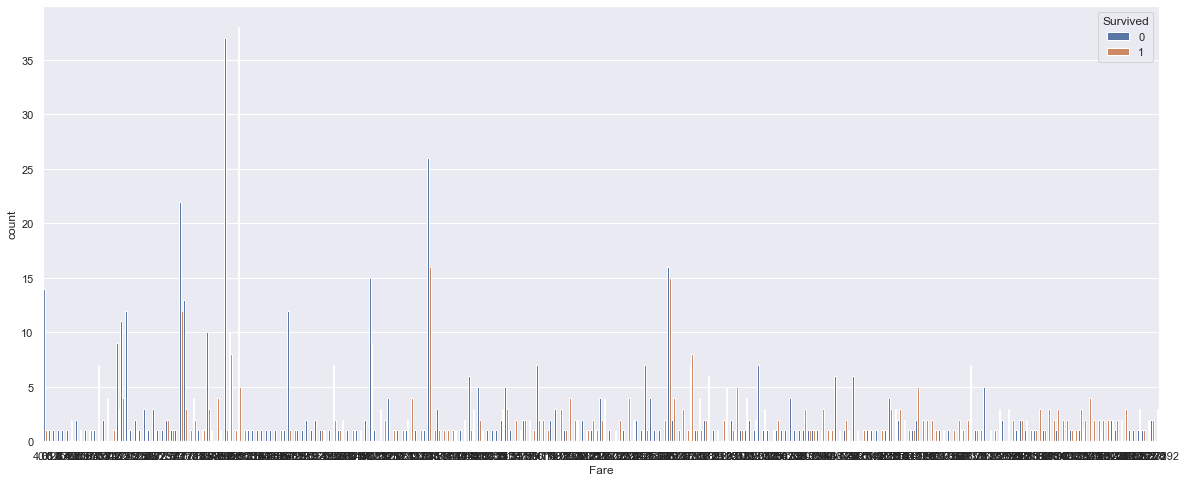

In [25]:
# it's hard to see if fare effets surviving on this plotting 
# we 'll try to use this data on our model
sns.set(rc={'figure.figsize':(20,8)})
sns.countplot(x=train['Fare'], hue=train['Survived'])

# PARCH

In [26]:
# parch is about family relations 
# childeren travelled with a nanny, mother,father, daughter, son , stepdaughter and stepson
#parch: The dataset defines family relations in this way...
#Parent = mother, father
#Child = daughter, son, stepdaughter, stepson
#Some children travelled only with a nanny, therefore parch=0 for them.
train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [27]:
train['Parch'].value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

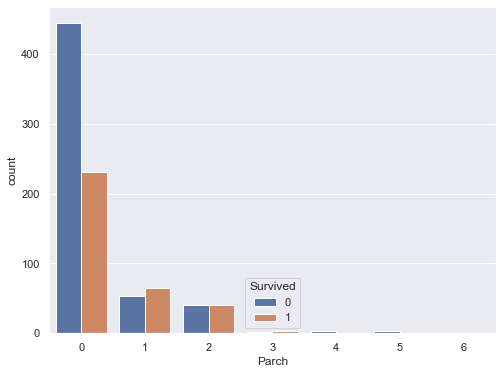

In [28]:
# check the relations between parch and survived data
plt.figure(figsize=(8,6))
sns.countplot(x="Parch", hue="Survived", data=train)
plt.show()

# SibSp

In [29]:
# SibSp data meaning is 
#sibsp: The dataset defines family relations in this way...
#Sibling = brother, sister, stepbrother, stepsister
#Spouse = husband, wife (mistresses and fiancés were ignored)
train['SibSp'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 8])

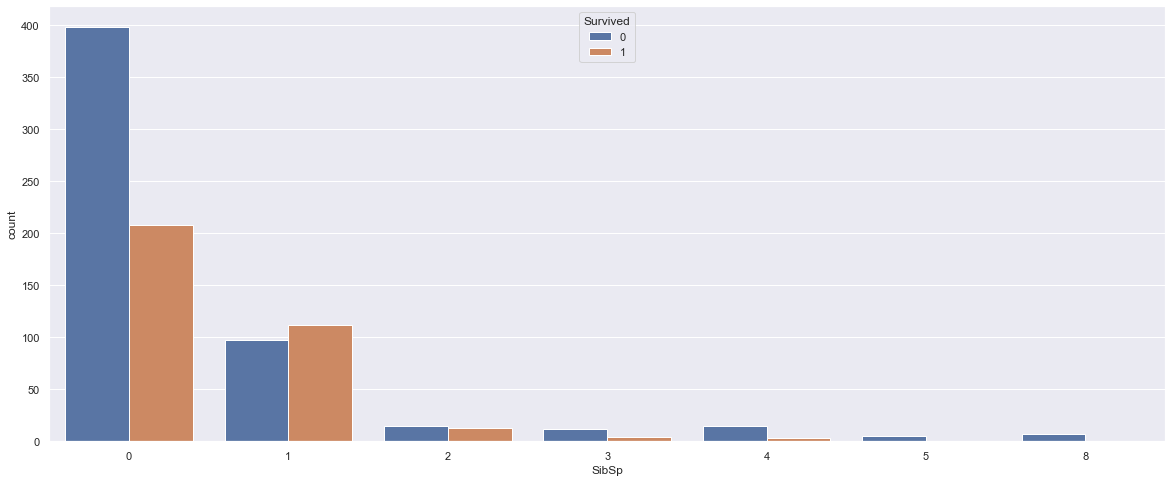

In [30]:
sns.countplot(x="SibSp", hue="Survived", data=train)
plt.show()

In [31]:
# Updating...

In [32]:
# DataSource https://www.kaggle.com/c/titanic/data

### **_EnesCavus_**